# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Votre nom: Ulysse Ristorcelli

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, chi2, gaussian_kde

In [3]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [4]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [6]:
regions = list(df.region.unique())

In [7]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [8]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [9]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [10]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

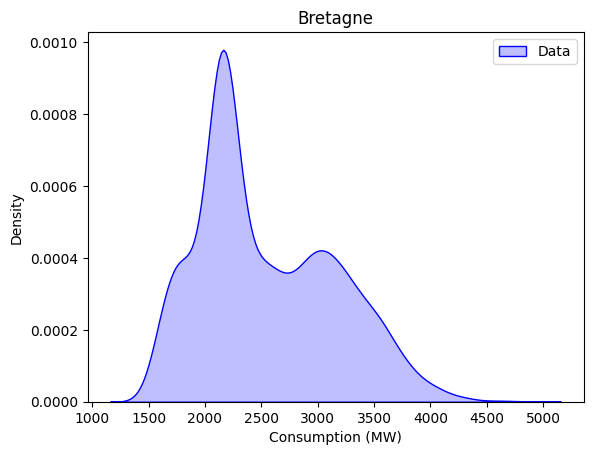

In [11]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [12]:
mean_Br = df_region["consumption"].mean()
print("valeur obtenue pour la moyenne: ",mean_Br)

var_Br = df_region["consumption"].var()
print("valeur obtenue pour la variance: ", var_Br)

valeur obtenue pour la moyenne:  2546.536155666579
valeur obtenue pour la variance:  365956.0141448174


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [13]:
new_data = np.random.normal(mean_Br, np.sqrt(var_Br), df_region["consumption"].count())

4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

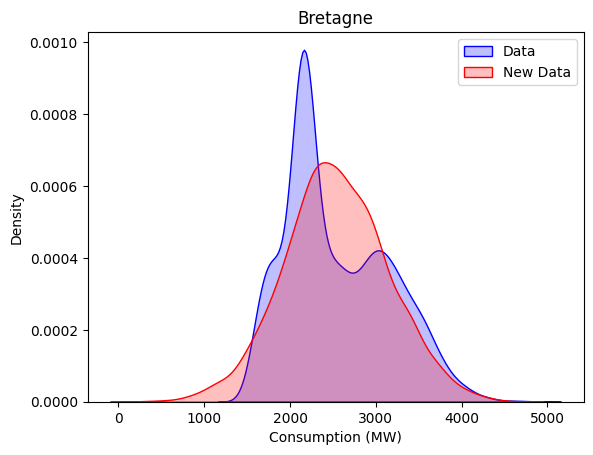

In [14]:
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=new_data, label="New Data", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

valeur obtenue pour la moyenne:  2546.536155666579
valeur obtenue pour la variance:  365956.0141448174


C:\Users\Ulysse\AppData\Local\Temp\ipykernel_29652\4068555978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["date"] = pd.to_datetime(df_region["date"])


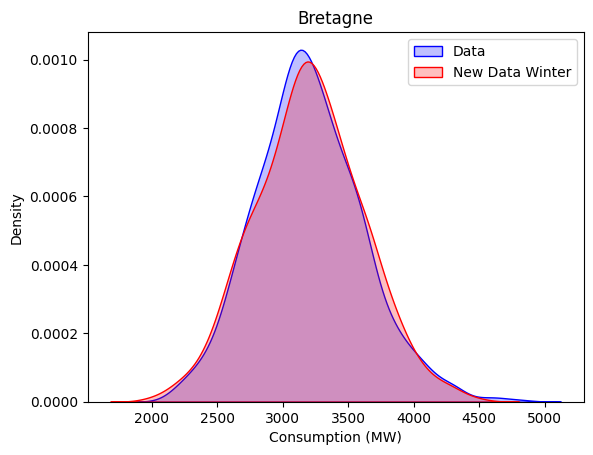

In [15]:
df_region_winter = []

# On convertit les dates en datetime
df_region["date"] = pd.to_datetime(df_region["date"])

for year in range(df_region['date'].dt.year.min(), df_region['date'].dt.year.max() + 1):
    start_date = pd.to_datetime(f'{year}-12-22')
    end_date = pd.to_datetime(f'{year + 1}-03-21')
    
    df_region_filtered = df_region.loc[(df_region['date'] >= start_date) & (df_region['date'] <= end_date)]
    
    df_region_winter.append(df_region_filtered)
df_region_winter = pd.concat(df_region_winter, ignore_index=True)

# Calcul de la moyenne et de la variance
mean_Br_Wint = df_region_winter["consumption"].mean()
print("valeur obtenue pour la moyenne: ",mean_Br)

var_Br_Wint = df_region_winter["consumption"].var()
print("valeur obtenue pour la variance: ", var_Br)

new_data_winter = np.random.normal(mean_Br_Wint, np.sqrt(var_Br_Wint), df_region_winter["consumption"].count())

sns.kdeplot(data=df_region_winter, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=new_data_winter, label="New Data Winter", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

On constate que l'hypothèse gaussienne est appropirée quand on se restreint à étudier une saison uniquement.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctions de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Votre réponse :

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [16]:
kde = gaussian_kde(df_region["consumption"])
density = gaussian_kde(new_data)

# On créer la fonction que l'on veut intégrer
inter_fct = lambda x: 0.5 * abs(kde(x) - density(x))

# Pour calculer d(f,g) on utilise la méthode des trapèzes
x = np.linspace(min(df_region["consumption"].min(), new_data.min()), max(df_region["consumption"].max(), new_data.max()), 10000)
dissimilarity = np.trapz(inter_fct(x), x)

In [17]:
dissimilarity

0.17200852124904825

3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [18]:
kde_winter = gaussian_kde(df_region_winter["consumption"])
density_winter = gaussian_kde(new_data_winter)

# On créer la fonction que l'on veut intégrer
inter_fct_winter = lambda x: 0.5 * abs(kde_winter(x) - density_winter(x))

# Pour calculer d(f,g) on utilise la méthode des trapèzes
x = np.linspace(min(df_region_winter["consumption"].min(), new_data_winter.min()), max(df_region_winter["consumption"].max(), new_data_winter.max()), 10000)
dissimilarity_winter =np.trapz(inter_fct_winter(x),x)

In [19]:
dissimilarity_winter

0.03559949326341716

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [38]:
dissimilarities = []

for region in regions:
    df_rg = df[df.region == region]
    mean_rg = df_rg["consumption"].mean()
    var_rg = df_rg["consumption"].var()
    
    new_data_rg = np.random.normal(mean_rg, np.sqrt(var_rg), df_rg["consumption"].count())
    kde_rg = gaussian_kde(df_rg["consumption"])
    density_rg = gaussian_kde(new_data_rg)

    # On créer la fonction que l'on veut intégrer
    inter_fct_rg = lambda x: 0.5 * abs(kde_rg(x) - density_rg(x))

    # Pour calculer d(f,g) on utilise la méthode des trapèzes
    x = np.linspace(min(df_rg["consumption"].min(), new_data_rg.min()), max(df_rg["consumption"].max(), new_data_rg.max()), 1000)
    dissimilarity_rg = np.trapz(inter_fct_rg(x), x)
    dissimilarities.append(dissimilarity_rg)

#dissimilarities = pd.DataFrame(dissimilarities, columns=['dissimilarity'])

dissimilarities_winter = []

for region in regions:
    
    df_rg = df[df.region == region]
    df_rg_winter = []

    # On convertit les dates en datetime
    df_rg["date"] = pd.to_datetime(df_rg["date"])

    for year in range(df_rg['date'].dt.year.min(), df_rg['date'].dt.year.max() + 1):
        start_date = pd.to_datetime(f'{year}-12-22')
        end_date = pd.to_datetime(f'{year + 1}-03-21')
        
        df_rg_filtered = df_rg.loc[(df_rg['date'] >= start_date) & (df_rg['date'] <= end_date)]
        
        df_rg_winter.append(df_rg_filtered)

    df_rg_winter = pd.concat(df_rg_winter, ignore_index=True)   
    mean_rg_winter = df_rg_winter["consumption"].mean()
    var_rg_winter = df_rg_winter["consumption"].var()
    
    new_data_rg_winter = np.random.normal(mean_rg_winter, np.sqrt(var_rg_winter), df_rg_winter["consumption"].count())
    kde_rg_winter = gaussian_kde(df_rg_winter["consumption"])
    density_rg_winter = gaussian_kde(new_data_rg_winter)

    # On créer la fonction que l'on veut intégrer
    inter_fct_rg_winter = lambda x: 0.5 * abs(kde_rg_winter(x) - density_rg_winter(x))

    # Pour calculer d(f,g) on utilise la méthode des trapèzes
    x = np.linspace(min(df_rg_winter["consumption"].min(), new_data_rg_winter.min()), max(df_rg_winter["consumption"].max(), new_data_rg_winter.max()), 1000)
    dissimilarity_rg_winter = np.trapz(inter_fct_rg_winter(x), x)
    dissimilarities_winter.append(dissimilarity_rg_winter)

#dissimilarities_winter = pd.DataFrame(dissimilarities_winter, columns=['winter_dissimilarity'])

#dissimilarities_merged = pd.concat([pd.DataFrame(regions, columns=['regions']),dissimilarities, dissimilarities_winter], ignore_index=True)

#On créer le DataFrame final
df_sim = pd.DataFrame(columns=['regions','dissimilarities','winter_dissimilarities'])

for i,region in enumerate(regions):
    row = {'regions': region, 'dissimilarities': dissimilarities[i], 'winter_dissimilarities': dissimilarities_winter[i]}
    df_sim= pd.concat([df_sim, pd.DataFrame([row])])

#On rajoute des indices aux lignes
df_sim = df_sim.reset_index(drop=True)

C:\Users\Ulysse\AppData\Local\Temp\ipykernel_29652\3114778075.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rg["date"] = pd.to_datetime(df_rg["date"])
C:\Users\Ulysse\AppData\Local\Temp\ipykernel_29652\3114778075.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rg["date"] = pd.to_datetime(df_rg["date"])
C:\Users\Ulysse\AppData\Local\Temp\ipykernel_29652\3114778075.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [39]:
df_sim

,regions,dissimilarities,winter_dissimilarities
0,Auvergne-Rhône-Alpes,0.168951,0.033189
1,Bourgogne-Franche-Comté,0.121050,0.023918
2,Bretagne,0.182221,0.026368
3,Centre-Val de Loire,0.183403,0.053978
4,Grand Est,0.120259,0.026566
5,Hauts-de-France,0.126148,0.031135
6,Normandie,0.169997,0.031676
7,Nouvelle-Aquitaine,0.210989,0.069830
8,Occitanie,0.221368,0.074947
9,Pays de la Loire,0.175585,0.033954


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [40]:
best_fit_winter = df_sim['winter_dissimilarities'].min()
best_fit_winter_id = df_sim['winter_dissimilarities'].idxmin()
region_best_fit_winter = df_sim.loc[best_fit_winter_id]
print("La région", region_best_fit_winter["regions"],"a le plus petit fit avec le modèle gaussien (", best_fit_winter,")")


La région Bourgogne-Franche-Comté a le plus petit fit avec le modèle gaussien ( 0.02391761335421841 )


6. Pour cette région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

C:\Users\Ulysse\AppData\Local\Temp\ipykernel_29652\4200522788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_best_fit["date"] = pd.to_datetime(df_region_best_fit["date"])


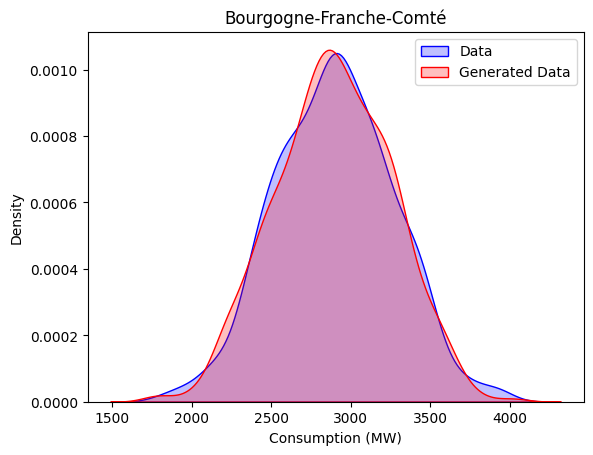

In [50]:
df_region_best_fit = df[df["region"] == region_best_fit_winter["regions"]]
df_region_winter_best_fit = []
# On convertit les dates en datetime
df_region_best_fit["date"] = pd.to_datetime(df_region_best_fit["date"])

for year in range(df_region_best_fit['date'].dt.year.min(), df_region_best_fit['date'].dt.year.max() + 1):
    start_date = pd.to_datetime(f'{year}-12-22')
    end_date = pd.to_datetime(f'{year + 1}-03-21')
    
    df_region_filtered_best_fit = df_region_best_fit.loc[(df_region_best_fit['date'] >= start_date) & (df_region_best_fit['date'] <= end_date)]
    
    df_region_winter_best_fit.append(df_region_filtered_best_fit)
df_region_winter_best_fit = pd.concat(df_region_winter_best_fit, ignore_index=True)

# Calcul de la moyenne et de la variance
mean_Br_Wint_best_fit = df_region_winter_best_fit["consumption"].mean()
var_Br_Wint_best_fit = df_region_winter_best_fit["consumption"].var()

new_data_winter_best_fit = np.random.normal(mean_Br_Wint_best_fit, np.sqrt(var_Br_Wint_best_fit), df_region_winter_best_fit["consumption"].count())

sns.kdeplot(data=df_region_winter_best_fit, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=new_data_winter_best_fit, label="Generated Data", color='red', fill=True)
plt.title(region_best_fit_winter["regions"])
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()



## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Votre réponse :

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Votre réponse :

2. Donnez le résultat de ce test pour $\alpha=1\%$.

## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Votre réponse :

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Votre réponse :

4. Donnez le résultat de ce test pour $\alpha=1\%$.

## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.